# project phase iv: on fashion & climate change

project contributors: jillian beck (jlb574), diane lee (ddl58), alex panovka (amp343), jonathan yun (jly37)

-----

## introduction

[add intro text here]

-----

## data description

#### motivation

#### composition

#### collection process

#### postprocessing / cleaning / labelling

-----

## preregistration statement

here are the following analyses we promised to conduct in project phase iii:

#### Analysis One:
- Goal: Analyze correlation between HDI (human development index) and GHG emissions per economic sector (i.e. Manufacturing, bunker fuel, etc)

- How we’re going to do it: We are going to make a new data frame. It will have these twelve columns: [Country, HDI from 2019,  average annual GHG emissions for each economic sector between 2014-2019 ( 5 columns), average annual change in GHG emissions for each economic sector between 2014-2019 (another 5 columns)]. We will then make a heatmap of the spearman correlation between each variable in the data frame. The reason we use spearman is because we care more about a country's relative HDI and GHG compared to other countries rather than what the actual values are. We will pay specific attention to the correlation between HDI and annual GHG emissions. This will represent five cells in the heat map, each cell being a correlation between emissions from a single sector and HDI. We will also check to see any strong correlations between other variables, such as HDI and change in emissions, and correlation between emissions in separate sectors. With these correlations we will be able to make statements about the relationship between the variables in this dataframe. 

- What we expect to find: We expect that there will be a strong positive correlation between HDI and GHG emissions suggesting that developed countries release more greenhouse gases. Conversely, we expect a strong negative correlation between HDI and change in GHG emissions suggesting that less developed countries are where most of the industrial growth is occurring. When looking at sectors specifically, we expect a slight negative correlation between HDI and GHG emissions from bunker fuel since developing countries often export their goods to developed countries. Finally we expect a high correlation between emissions from each sector, suggesting that countries that have high emissions in one sector also have high emissions in other sectors. Scatter plots of the data, done outside of this analysis, will allow us to see more specific relationships between sectors by country. The information we will gather from this analysis does not directly pertain to the fashion industry, but the knowledge it gives us about the relationship between development and emissions will help us understand if the relationship between development and environmental impact from fashion has unique characteristics.  

#### Analysis Two

- Goal: Examine the relationship between HDI and the importance of the fashion industry in a country’s economy. 

- How we’re going to do it: We are going to make a new data frame with these columns: [Country, HDI, cotton, clothing, garments, textiles]. The HDI column will be downloaded from the United Nations Development Programme, and we will just use the most recent year. Cotton, clothing, garment, and textiles will have data taken from the industries list from the CIA factbook. This page shows the top industries by annual output for every country, and we are looking at industries that are just related to fashion. In the data frame these columns will house values representing what rank that industry has in that country. For instance, textiles is fourth in the list of industries in Argentina, so the textiles value for Argentina will be 4. First we will find the correlation between HDI and fashion industries ranking. Next we will merge this data with the data relating to emissions from analysis one. We will create multiple scatter plots of industry rank versus emissions and change in emissions, with different emissions sectors for each plot, and then cluster the data. We expect the clusters to relate to HDI, so we will then make histograms of the HDI per cluster and determine if the clusters correspond to a country’s stage of development. 

- What we expect to find: We expect to find a negative correlation between HDI and the importance of fashion in a country’s economy. Based on our knowledge that most clothing is manufactured in developing countries, we expect developing countries to rely more on the fashion industry for their economies than developed countries. Across the scatter plots we expect to see clusters of high HDI countries where importance of fashion is low, and change in emissions is low, and where importance of fashion is low, but absolute emissions are high. For low HDI countries, we expect clusters where importance of fashion is high and change in emissions is high, and where importance of fashion is high and emissions are medium to low. Our data does not take into account the size of each country, so the clusters in the annual emissions plots might represent country size, but we expect the clusters in the scatter plots of change in emissions to definitely represent development. With this information we will be able to determine if less developed countries bear a greater burden from the fashion industry than developed countries. 

-----

## analysis one

in this analysis, we will analyze correlation between HDI (human development index) and GHG emissions per economic sector (i.e. manufacturing, bunker fuel, etc).

In [129]:
## load libraries

## our old friends...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ...and some new ones...
import seaborn as sns
from sklearn.cluster import KMeans

## ..and a most new friend
from sklearn.linear_model import LinearRegression

## load CSVs
agriculture=pd.read_csv('agriculture.csv', na_values={'false','False','FALSE'})
energy=pd.read_csv('energy.csv',  na_values={'false','False','FALSE'})
waste=pd.read_csv('waste.csv',   na_values={'false','False','FALSE'})
industrial=pd.read_csv('industrial-processes.csv',  na_values={'false','False','FALSE'})
bunker_fuels=pd.read_csv('bunker-fuels.csv',  na_values={'false','False','FALSE'})

In [130]:
## load HDI data
hdi = pd.read_csv('Human Development Index (HDI)-2.csv', header = 5)
cols = {'Country', '2019'} # subset to just keep 2019 hdis
hdi = hdi[cols] # keeping only relevant data

hdi['Country'] = hdi['Country'].str.strip(' ')

hdi = hdi.rename(columns={'Country': 'country', '2019': 'hdi'})

#### data analysis

first, let's see a little bit more about the hdi data, and then prepare it for merger with the ghg emissions datasets:

In [131]:
hdi.head()

,country,hdi
0,Afghanistan,0.511
1,Albania,0.795
2,Algeria,0.748
3,Andorra,0.868
4,Angola,0.581


In [132]:
agriculture = agriculture.sort_values('Country/Region')
energy = energy.sort_values('Country/Region')
waste = waste.sort_values('Country/Region')
industrial = industrial.sort_values('Country/Region')
bunker_fuels = bunker_fuels.sort_values('Country/Region')

ag_ghgchange = (agriculture['2018']-agriculture['2008'])
energy_ghgchange = (energy['2018']-energy['2008'])
waste_ghgchange = (waste['2018']-waste['2008'])
industrial_ghgchange = (industrial['2008']-industrial['1998'])
bunker_ghgchange = (bunker_fuels['2008']-bunker_fuels['1998'])

great! we've sorted, subtracted and prepared our datasets for analysis. let's merge them all together into one dataset about ghg emissions, per country, per industry:

In [133]:
data_ghgchange = {'country': agriculture['Country/Region'].str.strip(' '), 'agriculture': ag_ghgchange, 'energy': energy_ghgchange,
                  'waste': waste_ghgchange, 'industrial': industrial_ghgchange, 'bunker fuels': bunker_ghgchange}
df_ghgchange = pd.DataFrame.from_dict(data_ghgchange, orient = 'index')
df_ghgchange = df_ghgchange.transpose()

df_ghgchange

,country,agriculture,energy,waste,industrial,bunker fuels
57,Afghanistan,67.42,-4.08,-0.8,0.54,-1.3
145,Albania,2.17,0.68,0.95,0.05,-0.03
38,Algeria,58.44,-17.34,-0.39,5.61,0.56
177,Andorra,-0.05,0.15,0.08,0.0,0.0
47,Angola,1.2,64.3,-2.18,1.13,1.59
...,...,...,...,...,...,...
29,Venezuela,-67.4,44.14,0.62,6.66,1.41
23,Vietnam,126.44,126.77,1.21,3.64,-0.78
122,Yemen,-11.3,4.3,0.34,0.22,-0.03
59,Zambia,27.67,-5.72,0.52,0.89,0.63


let's also run some summary statistics on this:

In [134]:
print(df_ghgchange.describe())

print(df_ghgchange.dtypes)

       country  agriculture  energy  waste  industrial  bunker fuels
count      195       193.00  193.00  191.0       191.0         175.0
unique     195       191.00  187.00  150.0       147.0         139.0
top      Syria         0.03    0.68    0.0         0.0           0.0
freq         1         2.00    2.00   12.0        15.0          20.0
country         object
agriculture     object
energy          object
waste           object
industrial      object
bunker fuels    object
dtype: object


ok, our climate change emissions data (in megatons) should probably be numeric... let's do that, and then run summary statistics on it:

In [135]:
df_ghgchange["agriculture"] = df_ghgchange["agriculture"].astype(float)
df_ghgchange["energy"] = df_ghgchange["energy"].astype(float)
df_ghgchange["waste"] = df_ghgchange["waste"].astype(float)
df_ghgchange["industrial"] = df_ghgchange["industrial"].astype(float)
df_ghgchange["bunker fuels"] = df_ghgchange["bunker fuels"].astype(float)

df_ghgchange[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}].describe()

,energy,waste,bunker fuels,agriculture,industrial
count,193.000000,191.000000,175.000000,193.000000,191.000000
mean,22.548031,0.837068,1.664286,29.479896,3.758848
std,239.662242,5.387391,5.954713,259.370847,34.781706
min,-612.040000,-19.850000,-3.840000,-610.260000,-28.900000
25%,-1.240000,0.010000,0.000000,-0.610000,0.020000
50%,0.640000,0.150000,0.120000,1.830000,0.250000
75%,7.050000,0.845000,0.770000,14.970000,1.120000
max,3095.940000,57.180000,62.290000,3250.160000,476.610000


this data mostly makes sense (aside from some negative ghg emissions, which appear to be outliers), but also does not appear to be very comparable (since some countries might have 3250 megatons of co2-equivalent emissions solely based on size, and others might have almost 0 megatons as a small nation). let's standardize on the basis of population, using population data:

In [136]:
pop = pd.read_csv("WPP2019_TotalPopulationBySex.csv")

pop = pop[pop["Time"] == 2019] # ensuring it's only 2019 data
pop = pop[{"Location", "Time", "PopTotal"}] # removing unnecessary columns
pop = pop.rename(columns = {"Location" : "country"}) # renaming the column for the merge

df_ghgchange = df_ghgchange.merge(pop, on = "country") # performing an inner join

df_ghgchange.head()

df_ghgchange.columns

for emissions in {"agriculture", "energy", "waste", "industrial", "bunker fuels"}:
    df_ghgchange[emissions] = df_ghgchange[emissions] / df_ghgchange["PopTotal"]
    
df_ghgchange.head()

,country,agriculture,energy,waste,industrial,bunker fuels,Time,PopTotal
0,Afghanistan,0.001772,-0.000107,-0.000021,0.000014,-0.000034,2019,38041.757
1,Albania,0.000753,0.000236,0.000330,0.000017,-0.000010,2019,2880.913
2,Algeria,0.001357,-0.000403,-0.000009,0.000130,0.000013,2019,43053.054
3,Andorra,-0.000648,0.001944,0.001037,0.000000,0.000000,2019,77.146
4,Angola,0.000038,0.002020,-0.000068,0.000036,0.000050,2019,31825.299


nice! let's now merge this data with each country's human development index, and also drop the population column now that it's unneeded:

In [137]:
analysis_one = hdi.merge(df_ghgchange, on = 'country')

analysis_one.drop(["Time", "PopTotal"], axis = 1, inplace = True)
print(analysis_one.head())

analysis_one.isnull().values.any()

       country    hdi  agriculture    energy     waste  industrial  \
0  Afghanistan  0.511     0.001772 -0.000107 -0.000021    0.000014   
1      Albania  0.795     0.000753  0.000236  0.000330    0.000017   
2      Algeria  0.748     0.001357 -0.000403 -0.000009    0.000130   
3      Andorra  0.868    -0.000648  0.001944  0.001037    0.000000   
4       Angola  0.581     0.000038  0.002020 -0.000068    0.000036   

   bunker fuels  
0     -0.000034  
1     -0.000010  
2      0.000013  
3      0.000000  
4      0.000050  


True

interestingly, this data contains nans. let's remove them!

In [147]:
analysis_one = analysis_one.dropna()

Dear Diane and Jon,
    We are stealing your data frame. We renamed it as a new variable so we can use it later before you drop the country 

In [139]:
# second_analysis_one=analysis_one
analysis_one = analysis_one.drop(['country'], axis = 1)
analysis_one = analysis_one.astype(float)

in order to describe a little more about the data, let's create a heatmap to check for correlation! this is as follows:

In [140]:
analysis_one.corr(method = 'spearman')

,hdi,agriculture,energy,waste,industrial,bunker fuels
hdi,1.000000,-0.183555,0.187827,0.129007,0.278464,0.053446
agriculture,-0.183555,1.000000,-0.023319,0.113897,0.168232,0.037648
energy,0.187827,-0.023319,1.000000,0.127375,0.079025,0.078211
waste,0.129007,0.113897,0.127375,1.000000,0.047546,-0.020237
industrial,0.278464,0.168232,0.079025,0.047546,1.000000,0.274530
bunker fuels,0.053446,0.037648,0.078211,-0.020237,0.274530,1.000000


In [141]:
analysis_one.hdi.dtype

dtype('float64')

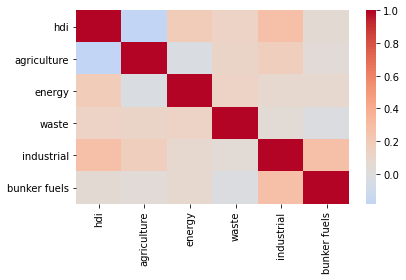

In [142]:
sns.heatmap(analysis_one.corr(method = 'spearman'), center=0, cmap='coolwarm')
plt.tight_layout()
plt.show()

these results might not be very significant in themselves, but we'd like to at least try to construct a model based on this data (given the wealth of what we have, and that there is a known correlation *at the least* between hdi and ghg emissions per capita). along these lines, let's try creating a multivariate linear regression to predict hdi, since hdi is a continuous float from 0-1:

In [148]:
regression1 = LinearRegression().fit(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], analysis_one["hdi"])
print("coefficients = {}".format(regression1.coef_))
print("r^2 = {}".format(regression1.score(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], analysis_one["hdi"])))

coefficients = [  6.86723421   7.08507715 -72.89289381  -1.8797825  288.46484019]
r^2 = 0.06860448875673764


#### evaluation of significance

already, this data doesn't seem particularly significant, but let's validate that with an evaluation of significance. for this, let's try bootstrapping our regression with n = 500 trials, to try and see how many slopes because of randomness could be more random than the one we got:

In [151]:
# creating the permutation method
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

count = 0

for i in range(500):
    permuted_model = LinearRegression().fit(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], permute(analysis_one["hdi"]))
    if(np.abs(permuted_model.coef_[0]) > np.abs(regression1.coef_[0])):
        count += 1
                                            
print("{} permuted slopes were of greater magnitude than the observed data.".format(count))
                                            
print("p-value implied: {:.5f}".format(count / 500))

210 permuted slopes were of greater magnitude than the observed data.
p-value implied: 0.42000


that is... exactly what we thought? unfortunately, the implied value is much greater than most p-value cutoffs traditionally used (p = 0.1, p = 0.05, or p = 0.01); as a result, this data doesn't seem to be much better than could be done by random chance :(

#### interpretation and conclusions

reflecting now (after completing the data analysis, and the evaluation of significance), it seems as if much of the prior data analysis isn't that significant. while we've found some (slightly) interesting trends, such as how ghg emissions are (somewhat) negatively correlated with hdi, we haven't found much else; the multivariate linear regression also did not return a statistically-significant slope. in this sense, i don't think that our results lined up with our initial expectations, that there would be a high correlation between hdi and certain industries' emissions; perhaps this is a quirk of our own analysis? it seems likely that climatewatch.org would be incentivized to publish such data if they proved significant connection between emissions and a countries "developedness": perhaps this sort of "mangling" of the data is how climate-change-related misinformation (and false statistics) spreads? 


#### limitations

there are certainly many limitations to this data: at the very least, part of the scope of this analysis seems limited, since it's about *greenhouse gas emissions by industry* and not pointing directly at fashion itself. but, looking into the data itself, it seems like there could be limitations just based on scale (in megatons, or with population in thousands); given that some countries inevitably get rounded down (to ~ 0 emissions), it seems harder to create significant analyses. this is unsatisfying; however, we are unsure how this might otherwise be solved (since all data will come with this issue as well).

#### acknowledgements

we'd like to thank our ta, anna, for her constant support for this project, and for many early-rising tas showing up in rhodes to answer the questions we had! :)

## analysis two

In [ ]:
industry_data=pd.read_csv('CIA_industry_data.csv')
industry_data=industry_data.rename(columns={'Country/Region': 'country'})
industry_data=industry_data.drop(columns='Jute')
industry_data.dtypes

In [ ]:
industry_data.head()

In [ ]:
analysis_two=hdi.merge(industry_data, how='left', on='country')
# analysis_two = analysis_two.drop(['country'], axis = 1)

In [ ]:
analysis_two[analysis_two.hdi.str.find('..')==0]

In [ ]:
analysis_two=analysis_two.drop([189,195])
analysis_two.hdi=analysis_two.hdi.astype(float)

In [ ]:
sns.heatmap(analysis_two.corr(), cmap='coolwarm')
plt.tight_layout()
plt.show()

In [ ]:
analysis_two.corr(method='pearson')

In [ ]:
analysis_two.hdi.dtype

In [ ]:
plt.scatter(analysis_two.Textiles, analysis_two.hdi)

In [ ]:
plt.scatter(analysis_two.Cotton, analysis_two.hdi)

In [ ]:
plt.scatter(analysis_two.Garments, analysis_two.hdi)

In [ ]:
plt.scatter(analysis_two.Clothing, analysis_two.hdi)

Here I'm merging the analysis_one dataframe that contains GHG emissions per sector ('countries','agriculture','energy','waste','industrial','bunker fuels') with the analysis_two df that contains the list of countries and their corresponding hdi and indexes regarding cotton, clothing, garments, and textiles.

In [ ]:
analysis_two

In this cell, we are merging our analysis_two dataframe with the GHG emission dataframe and loading the merged data into a new dataframe labeled "analysis_two_all"

In [ ]:
analysis_two_all = df_ghgchange.merge(analysis_two, how='left', on='country')
analysis_two_all

### Task List
- 1) Create a scatterplot for each sector compared against the GHG emissions. - Completed.
- 2) Cluster the data.
- 3) Make histogram of each cluster of HDI (assuming the clusters relate to HDI.
- 4) determine if there is a correlation between each cluster and a country's stage of developement.

These are scatterplots representing the different emission sectors in comparison to the Textile production index of each country (all data is taken from the analysis_two_all dataframe)

In [ ]:
list = ['agriculture','energy','waste','industrial','bunker fuels']
i = 0
for i in list:
    first_scatter = sns.scatterplot(x=analysis_two_all[i], y=analysis_two_all['Textiles'])
    first_scatter.set_xlabel(i + ' emissions')
    first_scatter.set_ylabel('Textiles Index')
    plt.show()

These are scatterplots representing the different emission sectors in comparison to the Cotton production index of each country. 

In [ ]:
for i in list:
    first_scatter = sns.scatterplot(x=analysis_two_all[i], y=analysis_two_all['Cotton'])
    first_scatter.set_xlabel(i + ' emissions')
    first_scatter.set_ylabel('Cotton Index')
    plt.show()

These are scatterplots representing the different emission sectors in comparison to the Clothing production index of each country. 

In [ ]:
for i in list:
    first_scatter = sns.scatterplot(x=analysis_two_all[i], y=analysis_two_all['Clothing'])
    first_scatter.set_xlabel(i + ' emissions')
    first_scatter.set_ylabel('Clothing Index')
    plt.show()

These are scatterplots representing the different emission sectors in comparison to the Garment production index of each country. 

In [ ]:
for i in list:
    first_scatter = sns.scatterplot(x=analysis_two_all[i], y=analysis_two_all['Garments'])
    first_scatter.set_xlabel(i + ' emissions')
    first_scatter.set_ylabel('Garments Index')
    plt.show()

In this cell, we are clustering the data. 

In [ ]:
clustering = KMeans(n_clusters = 3, random_state = 15)
KM = clustering.fit(analysis_two_all[["agriculture", "Textiles"]])
KM.cluster_centers_

cluster_labels = KM.labels_
print(cluster_labels[:5])
analysis_two_all["cluster_label"] = cluster_labels
analysis_two_all.head()








#for i in list: 
#    KM = clustering.fit(analysis_two_all[[i, "Textiles"]])
#    KM.cluster_centers_
 #   sns.relplot(x=analysis_two_all[i], y = "Textiles", style = "cluster_label", s = 80, alpha=.6, data = analysis_two_all)

In [ ]:
sns.relplot(x="bill_length_mm", y = "flipper_length_mm", style = "cluster_label", s = 80, hue = "species", alpha=.6, data = analysis_two_all)